# Relevance of microphysical processes

**Idea:** Plot the mean of the frozen and liquid mass changing processes against their occurrence. The higher they are on the diagonal, the more important they should be.    

This plot was created with and without text. The text has to be edited separately otherwise it looks very ugly and cluttered. To avoid more cluttering no grid lines and no "relative importance" (i.e. ratio of mean to occurrence) was plotted.

**Steps to get there:**
- Sum up all the processes of the frozen and liquid mass which overlap between single hydrometeors. 
- Then compute the mean of the processes mass change.
- Compute the total number of cases
- Compute the total change in each case
- Compute in how many of the total number of cases a processes makes at least more than 1% mass difference.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Data

In [17]:
# get data
fig_path='../../../plots/publication_plots/paper_wrapper_2023/'

# set threshold to avoid including numerical noise
threshold_tend = 1e-18

polar night data

In [3]:

df_fr_tends_pn = pd.read_csv('../../../data/processed/df_fr_tends_NDJF_2122.csv')
df_li_tends_pn = pd.read_csv('../../../data/processed/df_li_tends_NDJF_2122.csv')
df_qv_tends_pn = pd.read_csv('../../../data/processed/df_qv_tends_NDJF_2122.csv')

# drop T, sat_i, W, QV, columns
df_fr_tends_pn = df_fr_tends_pn.drop(columns=['T', 'sat_i', 'W', 'QV', 'sat_w'])
df_li_tends_pn = df_li_tends_pn.drop(columns=['T', 'sat_i', 'W', 'QV', 'sat_w'])

# set values below threshold to 0
df_fr_tends_pn = df_fr_tends_pn.where(df_fr_tends_pn > threshold_tend, 0)
df_li_tends_pn = df_li_tends_pn.where(df_li_tends_pn > threshold_tend, 0)

# get percentage of each process in the total budget
# devide all columns by the total budget
df_fr_tends_perc_pn = df_fr_tends_pn.div(df_fr_tends_pn['total_fr'], axis=0)
df_li_tends_perc_pn = df_li_tends_pn.div(df_li_tends_pn['total_li'], axis=0)
# drop the total column
df_fr_tends_perc_pn = df_fr_tends_perc_pn.drop(columns=['total_fr'])
df_li_tends_perc_pn = df_li_tends_perc_pn.drop(columns=['total_li'])

display(df_li_tends_pn.describe())
display(df_fr_tends_pn.describe())

,auSB,acSB,evaporation_li,c_homfr_li,homhet_li,rime_li,r_freeze_li,melt_li,condensation_li,ccn_act_li,total_li
count,5277756.0,5277756.0,5.277756e+06,5.277756e+06,5277756.0,5.277756e+06,5.277756e+06,5.277756e+06,5.277756e+06,5.277756e+06,5.277756e+06
mean,0.0,0.0,2.329527e-08,5.554247e-22,0.0,2.787892e-09,3.875419e-12,4.102880e-10,1.853996e-08,1.926788e-11,4.505655e-08
std,0.0,0.0,1.219177e-07,1.464442e-19,0.0,4.280583e-08,1.930594e-10,1.363365e-08,1.036376e-07,1.036226e-09,1.763317e-07
min,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,7.484757e-14,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.433427e-12
75%,0.0,0.0,4.003508e-10,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.805217e-09
max,0.0,0.0,9.289123e-06,8.673312e-17,0.0,3.839696e-06,9.300407e-08,1.951853e-06,7.644227e-06,2.816498e-07,9.289128e-06


,deposition_fr,sublimation_fr,rime_fr,homhet_fr,c_homfr_fr,fr_col,fr_eva_fr,g_to_h,r_freeze_fr,melt_fr,total_fr
count,5.277756e+06,5.277756e+06,5.277756e+06,5.277756e+06,5.277756e+06,5277756.0,5.277756e+06,5277756.0,5.277756e+06,5.277756e+06,5.277756e+06
mean,2.985466e-08,2.417744e-08,2.787892e-09,4.038390e-15,5.554461e-22,0.0,1.431218e-10,0.0,3.875419e-12,4.102880e-10,5.737728e-08
std,1.333321e-07,9.140822e-08,4.280583e-08,1.231204e-13,1.464449e-19,0.0,6.126544e-09,0.0,1.930594e-10,1.363365e-08,1.752486e-07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.460130e-10
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3.890975e-09
75%,4.355883e-09,3.223263e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,2.875899e-08
max,3.712750e-06,2.047393e-06,3.839696e-06,1.671031e-10,8.673390e-17,0.0,5.926994e-07,0.0,9.300407e-08,1.951853e-06,4.565590e-06


In [5]:
# compute the percentage of time each process is active and the mean
count_fr_pn = np.zeros((len(df_fr_tends_perc_pn.columns),len(df_fr_tends_perc_pn.columns)) )
# do this for all the other processes
for i, process in enumerate(df_fr_tends_perc_pn.columns):
        print(i, process)
        count_fr_pn[0,i] = df_fr_tends_perc_pn[process].where(df_fr_tends_perc_pn[process] > 0.01).count()/ \
                           df_fr_tends_perc_pn[process].count()*100
        count_fr_pn[1,i] = df_fr_tends_pn[process].mean(skipna=True)

# same for liquid 
count_liq_pn = np.zeros((len(df_li_tends_perc_pn.columns),len(df_li_tends_perc_pn.columns)) )
# do this for all the other processes
for i, process in enumerate(df_li_tends_perc_pn.columns):
        print(i, process)
        count_liq_pn[0,i] = df_li_tends_perc_pn[process].where(df_li_tends_perc_pn[process] > 0.01).count()/ \
                           df_li_tends_perc_pn[process].count()*100
        count_liq_pn[1,i] = df_li_tends_pn[process].mean(skipna=True)

print(count_fr_pn[1][3], count_liq_pn[1][4])

0 deposition_fr


1 sublimation_fr
2 rime_fr
3 homhet_fr
4 c_homfr_fr
5 fr_col
6 fr_eva_fr
7 g_to_h
8 r_freeze_fr
9 melt_fr
0 auSB
1 acSB
2 evaporation_li
3 c_homfr_li
4 homhet_li
5 rime_li
6 r_freeze_li
7 melt_li
8 condensation_li
9 ccn_act_li
4.03838982791442e-15 0.0


polar day data

In [7]:

df_fr_tends_pd = pd.read_csv('../../../data/processed/df_fr_tends_MJJA_S21.csv')
df_li_tends_pd = pd.read_csv('../../../data/processed/df_li_tends_MJJA_S21.csv')
df_qv_tends_pd = pd.read_csv('../../../data/processed/df_qv_tends_MJJA_S21.csv')

# drop T, sat_i, W, QV, columns
df_fr_tends_pd = df_fr_tends_pd.drop(columns=['T', 'sat_i', 'W', 'QV', 'sat_w'])
df_li_tends_pd = df_li_tends_pd.drop(columns=['T', 'sat_i', 'W', 'QV', 'sat_w'])

# set values below threshold to 0
df_fr_tends_pd = df_fr_tends_pd.where(df_fr_tends_pd > threshold_tend, 0)
df_li_tends_pd = df_li_tends_pd.where(df_li_tends_pd > threshold_tend, 0)

# get percentage of each process in the total budget
# devide all columns by the total budget
df_fr_tends_perc_pd = df_fr_tends_pd.div(df_fr_tends_pd['total_fr'], axis=0)
df_li_tends_perc_pd = df_li_tends_pd.div(df_li_tends_pd['total_li'], axis=0)
# drop the total column
df_fr_tends_perc_pd = df_fr_tends_perc_pd.drop(columns=['total_fr'])
df_li_tends_perc_pd = df_li_tends_perc_pd.drop(columns=['total_li'])

display(df_li_tends_pd.describe())
display(df_fr_tends_pd.describe())

,auSB,acSB,evaporation_li,c_homfr_li,homhet_li,rime_li,r_freeze_li,melt_li,condensation_li,ccn_act_li,total_li
count,5745699.0,5745699.0,5.745699e+06,5745699.0,5745699.0,5.745699e+06,5.745699e+06,5.745699e+06,5.745699e+06,5.745699e+06,5.745699e+06
mean,0.0,0.0,3.800319e-08,0.0,0.0,1.739451e-10,1.391021e-12,3.533301e-10,3.416552e-08,3.977951e-11,7.273716e-08
std,0.0,0.0,1.350386e-07,0.0,0.0,6.693553e-09,2.984849e-11,9.911468e-09,1.641668e-07,1.398602e-09,2.068207e-07
min,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,4.242902e-12,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.700376e-10
50%,0.0,0.0,1.861097e-09,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.244632e-08
75%,0.0,0.0,2.464443e-08,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.605835e-08
max,0.0,0.0,2.455060e-05,0.0,0.0,1.043216e-06,3.155673e-09,2.066405e-06,4.148707e-05,2.619201e-07,4.148707e-05


,deposition_fr,sublimation_fr,rime_fr,homhet_fr,c_homfr_fr,fr_col,fr_eva_fr,g_to_h,r_freeze_fr,melt_fr,total_fr
count,5.745699e+06,5.745699e+06,5.745699e+06,5.745699e+06,5745699.0,5745699.0,5.745699e+06,5745699.0,5.745699e+06,5.745699e+06,5.745699e+06
mean,5.942106e-10,9.624927e-10,1.739451e-10,1.927201e-15,0.0,0.0,2.783697e-12,0.0,1.391021e-12,3.533301e-10,2.088155e-09
std,4.525915e-09,1.866228e-08,6.693553e-09,1.169220e-13,0.0,0.0,1.424589e-10,0.0,2.984849e-11,9.911468e-09,2.340637e-08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.380609e-15
75%,1.176885e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,2.908991e-11
max,2.442119e-07,1.580710e-06,1.043216e-06,1.453253e-10,0.0,0.0,4.993368e-08,0.0,3.155673e-09,2.066405e-06,2.071629e-06


In [8]:
# compute the percentage of time each process is active and the mean
count_fr_pd = np.zeros((len(df_fr_tends_perc_pd.columns),len(df_fr_tends_perc_pd.columns)) )
# do this for all the other processes
for i, process in enumerate(df_fr_tends_perc_pd.columns):
        print(i, process)
        count_fr_pd[0,i] = df_fr_tends_perc_pd[process].where(df_fr_tends_perc_pd[process] > 0.01).count()/ \
                           df_fr_tends_perc_pd[process].count()*100
        count_fr_pd[1,i] = df_fr_tends_pd[process].mean(skipna=True)

# same for liquid 
count_liq_pd = np.zeros((len(df_li_tends_perc_pd.columns),len(df_li_tends_perc_pd.columns)) )
# do this for all the other processes
for i, process in enumerate(df_li_tends_perc_pd.columns):
        print(i, process)
        count_liq_pd[0,i] = df_li_tends_perc_pd[process].where(df_li_tends_perc_pd[process] > 0.01).count()/ \
                           df_li_tends_perc_pd[process].count()*100
        count_liq_pd[1,i] = df_li_tends_pd[process].mean(skipna=True)

print(count_fr_pd[1][3], count_liq_pd[1][4])

0 deposition_fr
1 sublimation_fr
2 rime_fr
3 homhet_fr
4 c_homfr_fr
5 fr_col
6 fr_eva_fr
7 g_to_h
8 r_freeze_fr
9 melt_fr
0 auSB
1 acSB
2 evaporation_li
3 c_homfr_li
4 homhet_li
5 rime_li
6 r_freeze_li
7 melt_li
8 condensation_li
9 ccn_act_li
1.9272012241612926e-15 0.0


## 2. Plots

0 deposition_fr
1 sublimation_fr
2 rime_fr
3 homhet_fr
4 c_homfr_fr
5 fr_col
6 fr_eva_fr
7 g_to_h
8 r_freeze_fr
9 melt_fr
0 auSB
1 acSB
2 evaporation_li
3 c_homfr_li
4 homhet_li
5 rime_li
6 r_freeze_li
7 melt_li
8 condensation_li
9 ccn_act_li
0 deposition_fr
1 sublimation_fr
2 rime_fr
3 homhet_fr
4 c_homfr_fr
5 fr_col
6 fr_eva_fr
7 g_to_h
8 r_freeze_fr
9 melt_fr
0 auSB
1 acSB
2 evaporation_li
3 c_homfr_li
4 homhet_li
5 rime_li
6 r_freeze_li
7 melt_li
8 condensation_li
9 ccn_act_li


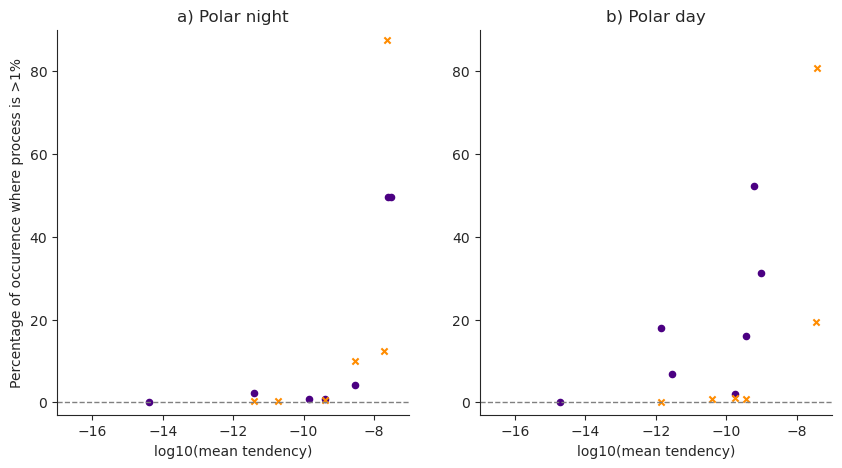

In [29]:
# create plot with 2 columns, one for each season
# do not plot the upper and right border only the left and bottom
sns.set_style("ticks")

fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.set_style("ticks")

axs = axs.ravel()
axs[0].set_xlabel('log10(mean tendency)')
axs[0].set_ylabel('Percentage of occurence where process is >1%')
axs[1].set_xlabel('log10(mean tendency)')
axs[1].set_ylabel('')
axs[0].set_xlim(-17,-7)
axs[0].set_ylim(-3,90)
axs[1].set_xlim(-17,-7)
axs[1].set_ylim(-3,90)
axs[0].set_title('a) Polar night')
axs[1].set_title('b) Polar day')
# add labels to each point with the name of the process
for i, txt in enumerate(df_fr_tends_perc_pn.columns):
    print(i, txt)
    # only plot processes which have a mean change above 1e-18
    if (count_fr_pn[1][i] > 1e-18):
        #plt.annotate(txt, (np.log10(count[1][i]), count[0][i]))
        axs[0].scatter(np.log10(count_fr_pn[1][i]), count_fr_pn[0][i], s=20, color="indigo")
        #axs[0].annotate(txt, (np.log10(count_fr_pn[1][i]), count_fr_pn[0][i]), fontsize=8)
for i, txt in enumerate(df_li_tends_perc_pn.columns):
    print(i, txt)
    if (count_liq_pn[1][i] > 1e-18):
        #plt.annotate(txt, (np.log10(count_liq[1][i]), count_liq[0][i]))
        axs[0].scatter(np.log10(count_liq_pn[1][i]), count_liq_pn[0][i], s=20, color="darkorange",
                    marker='x')
        #axs[0].annotate(txt, (np.log10(count_liq_pn[1][i]), count_liq_pn[0][i]), fontsize=8)

for i, txt in enumerate(df_fr_tends_perc_pd.columns):
    print(i, txt)
    # only plot processes which have a mean change above 1e-18
    if (count_fr_pd[1][i] > 1e-18):
        #plt.annotate(txt, (np.log10(count[1][i]), count[0][i]))
        axs[1].scatter(np.log10(count_fr_pd[1][i]), count_fr_pd[0][i], s=20, color="indigo")
        #axs[1].annotate(txt, (np.log10(count_fr_pd[1][i]), count_fr_pd[0][i]), fontsize=8)
for i, txt in enumerate(df_li_tends_perc_pd.columns):
    print(i, txt)
    if (count_liq_pd[1][i] > 1e-18):
        #plt.annotate(txt, (np.log10(count_liq[1][i]), count_liq[0][i]))
        axs[1].scatter(np.log10(count_liq_pd[1][i]), count_liq_pd[0][i], s=20, color="darkorange",
                    marker='x')
        #axs[1].annotate(txt, (np.log10(count_liq_pd[1][i]), count_liq_pd[0][i]), fontsize=8)

# add a dashed  thin line at y=0
axs[0].axhline(y=0, color='grey', linestyle='--', linewidth=1)
axs[1].axhline(y=0, color='grey', linestyle='--', linewidth=1)

sns.despine()  

plt.savefig(fig_path+'scatter_dominating_proc_NDJF_MJJA_W2122_notext.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()
